# Overview
First, the total railway miles per state from the US Department of Transportation(US DOT) rail data is computed. Then, the rail density per state is calculated by normalizing our data in miles per square mile of railway. After the table of these computations is created, two heatmaps are created to show a visual representation of the states' total miles of railway and the highest railway density respectively. This is then created into an interactive visual where you can hover over states to find the values of total railway mileage and railway density of a certain state. The interactive visual's purpose is to show the difference of both computations for a given state. For example, a state that has a high summation of railway like Texas might not actually have a high railway density.

In [14]:
# Importing the necessary packages
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
#Reading in all rail network lines in North America from the US DOT website
rail = gpd.read_file("C:/Users/shiva/Downloads/North_American_Rail_Network_Lines.geojson")

# Rail Density Calculation For Every State(except AK and HI)

In [46]:
import pandas as pd
import geopandas as gpd

# List of state abbreviations and their areas in square miles
states_info = {
    'AL': 52420.07, 'AZ': 113990.30, 'AR': 53178.55, 'CA': 163695.57, 'CO': 104093.67,
    'CT': 5543.41, 'DE': 2488.72, 'FL': 65757.70, 'GA': 59425.15, 'ID': 82643.12,
    'IL': 57913.55, 'IN': 36419.55, 'IA': 56272.81, 'KS': 82278.36, 'KY': 40407.80, 'LA': 52378.13,
    'ME': 35379.74, 'MD': 12405.93, 'MA': 10554.39, 'MI': 96713.51, 'MN': 86935.83, 'MS': 48431.78,
    'MO': 69706.99, 'MT': 147039.71, 'NE': 77347.81, 'NV': 110571.82
}
#creation of lists for the three columns 
state_list = []
total_miles_list = []
railway_density_list = []

# Iterate over each state and calculate railway density
for state_abbr, area_sqmi in states_info.items():
    # Filter the rail segments for the current state
    state_rail = rail[rail['stateab'] == state_abbr]
    
    # Sum the 'miles' column to get the total miles of railway
    total_miles = state_rail['miles'].sum()
    
    # Calculate railway density (miles of railway per square mile)
    railway_density = total_miles / area_sqmi
    
    # Append data to the lists
    state_list.append(state_abbr)
    total_miles_list.append(total_miles)
    railway_density_list.append(railway_density)
    
    # Create a DataFrame from the lists
data = {
    'State': state_list,
    'Total Railway Miles': total_miles_list,
    'Miles per square mile': railway_density_list
}
df = pd.DataFrame(data)

print(df.to_string(index=False))

State  Total Railway Miles  Miles per square mile
   AL          4378.542563               0.083528
   AZ          2677.630689               0.023490
   AR          3393.561743               0.063814
   CA          9449.725187               0.057727
   CO          3846.134864               0.036949
   CT           723.317985               0.130482
   DE           351.891916               0.141395
   FL          4121.150342               0.062672
   GA          5683.633174               0.095644
   ID          2657.700755               0.032159
   IL          9997.633193               0.172630
   IN          5778.981710               0.158678
   IA          5168.529063               0.091848
   KS          6344.912323               0.077115
   KY          3583.793360               0.088691
   LA          3716.251201               0.070950
   ME          1750.035475               0.049464
   MD          1325.402715               0.106836
   MA          1481.295083               0.140349


In [47]:
import pandas as pd
import geopandas as gpd

# List of state abbreviations and their areas in square miles
states_info = {
    'NH': 9349.16, 'NJ': 8721.30,
    'NM': 121590.30, 'NY': 54554.98, 'NC': 53819.16, 'ND': 70709.56, 'OH': 44825.58, 'OK': 69898.87,
    'OR': 98378.54, 'PA': 46054.34, 'RI': 1544.89, 'SC': 32020.49, 'SD': 77115.68, 'TN': 42144.25,
    'TX': 268596.46, 'UT': 84896.88, 'VT': 9615.30, 'VA': 42774.93, 'WA': 71297.95, 'WV': 24230.04,
    'WI': 65496.38, 'WY': 97813.01
}
#creation of lists for the three columns 
state_list = []
total_miles_list = []
railway_density_list = []

# Iterate over each state and calculate railway density
for state_abbr, area_sqmi in states_info.items():
    # Filter the rail segments for the current state
    state_rail = rail[rail['stateab'] == state_abbr]
    
    # Sum the 'miles' column to get the total miles of railway
    total_miles = state_rail['miles'].sum()
    
    # Calculate railway density (miles of railway per square mile)
    railway_density = total_miles / area_sqmi
    
    # Append data to the lists
    state_list.append(state_abbr)
    total_miles_list.append(total_miles)
    railway_density_list.append(railway_density)
    
    # Create a DataFrame from the lists
data = {
    'State': state_list,
    'Total Railway Miles': total_miles_list,
    'Miles per square mile': railway_density_list
}
df = pd.DataFrame(data)

print(df.to_string(index=False))

State  Total Railway Miles  Miles per square mile
   NH           633.025014               0.067709
   NJ          2010.217156               0.230495
   NM          2878.683542               0.023675
   NY          5113.250043               0.093727
   NC          4431.976648               0.082349
   ND          4255.021797               0.060176
   OH          7557.969068               0.168608
   OK          4181.508852               0.059822
   OR          3303.510134               0.033580
   PA          7455.399370               0.161883
   RI           182.936491               0.118414
   SC          2939.405812               0.091798
   SD          2410.740032               0.031261
   TN          3820.640985               0.090656
   TX         14316.996541               0.053303
   UT          2700.535388               0.031810
   VT           682.473450               0.070978
   VA          4309.631671               0.100751
   WA          5452.205625               0.076471


# Total Railway Miles Heatmap

Index(['id', 'name', 'density', 'geometry', 'state_abbreviation', 'State',
       'Total_Railway_Miles'],
      dtype='object')


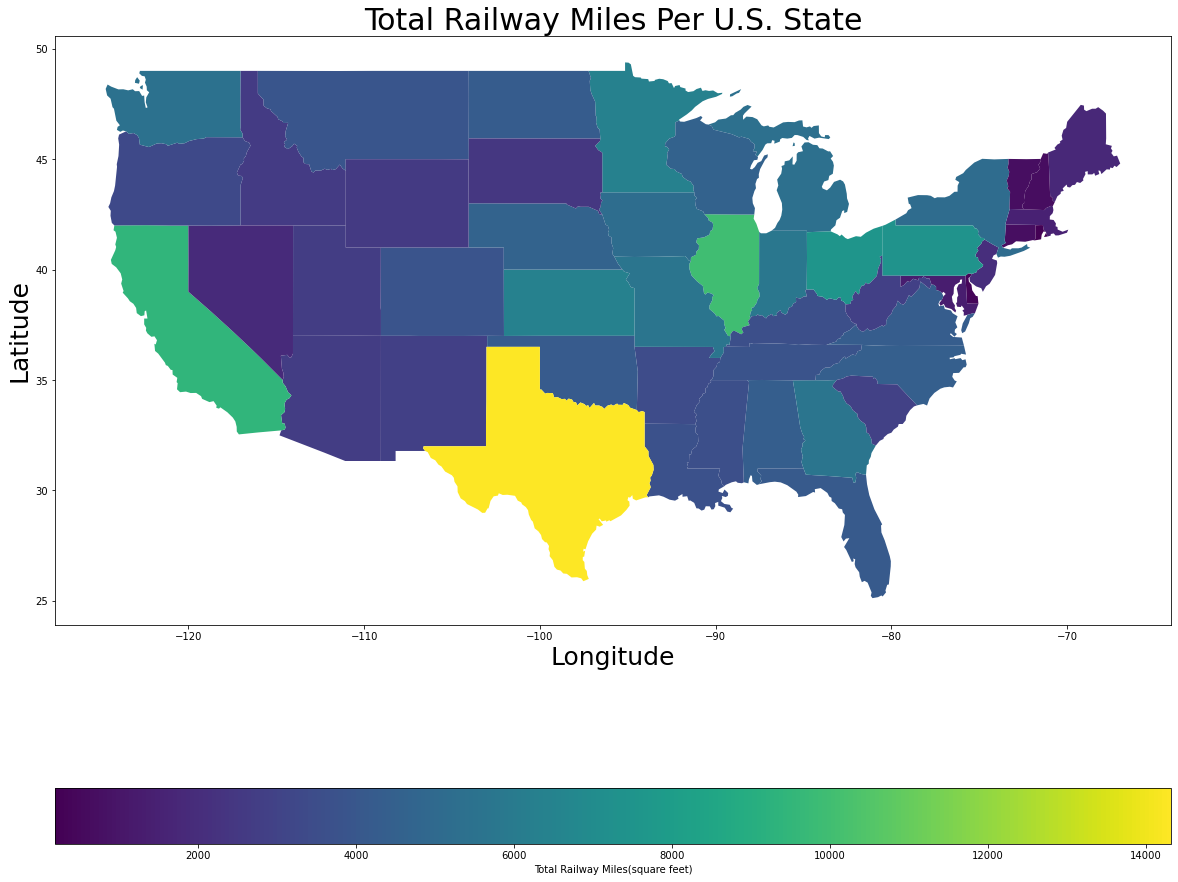

In [95]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load an external U.S. states GeoJSON
us_states = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")

# Dataframe of railway total miles column
data = {
    'State': ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 
              'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'Total_Railway_Miles': [4378.542563, 2677.630689, 3393.561743, 9449.725187, 3846.134864, 723.317985, 351.891916 , 4121.150342, 5683.633174, 2657.700755, 9997.633193 ,  5778.981710, 5168.529063 , 6344.912323,
                             3583.793360, 3716.251201, 1750.035475, 1325.402715, 1481.295083, 5324.299425, 6360.727051, 3571.201486, 5674.210168, 3917.015401, 4622.214397, 1894.295982, 633.025014, 2010.217156,
                            2878.683542, 5113.250043, 4431.976648, 4255.021797, 7557.969068, 4181.508852, 3303.510134, 7455.399370, 182.936491, 2939.405812, 2410.740032, 3820.640985, 14316.996541, 2700.535388,
                            682.473450, 4309.631671, 5452.205625, 2840.014991, 4587.705868, 2571.143066]
}

df = pd.DataFrame(data)

# Mapping from IDs to state abbreviations
id_to_state = {
    '01': 'AL', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
    '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC',
    '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY',
    '72': 'PR'
}

# Applying the mapping to the us_states GeoDataFrame
us_states['state_abbreviation'] = us_states['id'].map(id_to_state)
merged = us_states.merge(df, left_on='state_abbreviation', right_on='State')
print(merged.columns)


# Plotting the Railway Density Heatmap
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column='Total_Railway_Miles', ax=ax, legend=True,
            legend_kwds={'label': "Total Railway Miles(square feet)", 'orientation': "horizontal"})  
plt.title('Total Railway Miles Per U.S. State', fontsize=30)
ax.set_xlabel('Longitude', fontsize=25)  
ax.set_ylabel('Latitude', fontsize=25)  
plt.show()




# Railway Density Heatmap

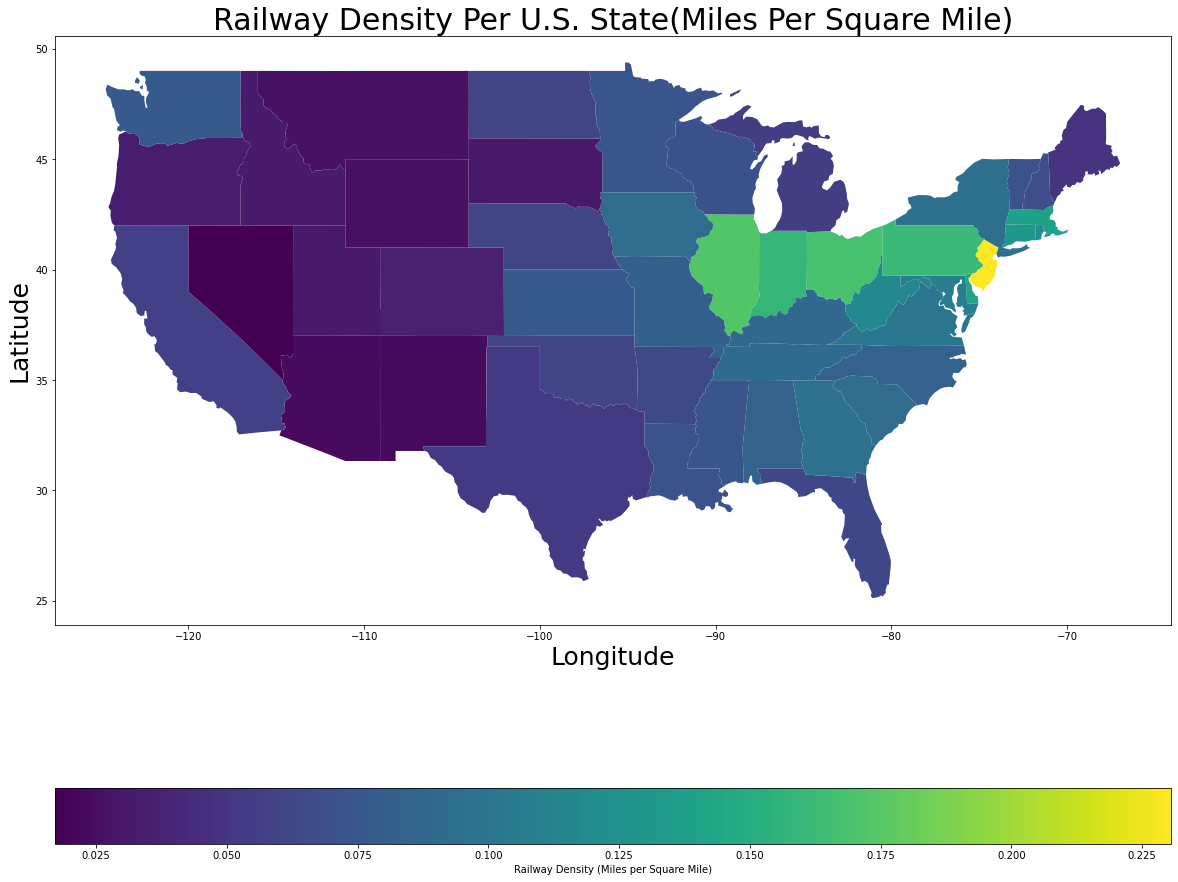

In [97]:
import geopandas as gpd
import pandas as pd

# Load an external U.S. states GeoJSON
us_states = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")

# Dataframe of railway density column
data = {
    'State': ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 
              'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'Railway_Density': [0.083528,   0.023490, 0.063814,  0.057727,  0.036949,  0.130482, 0.141395, 0.062672, 0.095644, 0.032159, 0.172630,  0.158678, 0.091848, 0.077115, 
                        0.088691, 0.070950, 0.049464, 0.106836,  0.140349, 0.055052,  0.073166, 0.073737,  0.081401,  0.026639, 0.059759, 0.017132, 0.067709, 0.230495,
                        0.023675, 0.093727, 0.082349, 0.060176, 0.168608, 0.059822, 0.033580, 0.161883,  0.118414, 0.091798, 0.031261, 0.090656, 0.053303, 0.031810,
                        0.070978, 0.100751,  0.076471, 0.117210, 0.070045, 0.026286]
}
df = pd.DataFrame(data)


# Mapping from IDs to state abbreviations
id_to_state = {
    '01': 'AL', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
    '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC',
    '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY',
    '72': 'PR'
}

# Applying this mapping to the us_states GeoDataFrame
us_states['state_abbreviation'] = us_states['id'].map(id_to_state)

merged = us_states.merge(df, left_on='state_abbreviation', right_on='State')


# Plotting the Railway Density Heatmap
fig, ax = plt.subplots(1, figsize=(20,20))

merged.plot(column='Railway_Density', ax=ax, legend=True,
            legend_kwds={'label': "Railway Density (Miles per Square Mile)", 'orientation': "horizontal"})  
plt.title('Railway Density Per U.S. State(Miles Per Square Mile)', fontsize=30)
ax.set_xlabel('Longitude', fontsize=25)  
ax.set_ylabel('Latitude', fontsize=25)  
plt.show()


# Interactive Comparison of Heatmaps

In [59]:
#installing 'Bokeh' Python library for interactive visualizations
#pip install bokeh

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load an external U.S. states GeoJSON
us_states = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")

# Data for Total Railway Miles
data1 = {
    'State': ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 
              'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'Total_Railway_Miles': [4378.542563, 2677.630689, 3393.561743, 9449.725187, 3846.134864, 723.317985, 351.891916 , 4121.150342, 5683.633174, 2657.700755, 9997.633193 ,  5778.981710, 5168.529063 , 6344.912323,
                             3583.793360, 3716.251201, 1750.035475, 1325.402715, 1481.295083, 5324.299425, 6360.727051, 3571.201486, 5674.210168, 3917.015401, 4622.214397, 1894.295982, 633.025014, 2010.217156,
                            2878.683542, 5113.250043, 4431.976648, 4255.021797, 7557.969068, 4181.508852, 3303.510134, 7455.399370, 182.936491, 2939.405812, 2410.740032, 3820.640985, 14316.996541, 2700.535388,
                            682.473450, 4309.631671, 5452.205625, 2840.014991, 4587.705868, 2571.143066]
}
df1 = pd.DataFrame(data1)

# Data for Railway Density
data2 = {
    'State': ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 
              'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'Railway_Density': [0.083528,   0.023490, 0.063814,  0.057727,  0.036949,  0.130482, 0.141395, 0.062672, 0.095644, 0.032159, 0.172630,  0.158678, 0.091848, 0.077115, 
                        0.088691, 0.070950, 0.049464, 0.106836,  0.140349, 0.055052,  0.073166, 0.073737,  0.081401,  0.026639, 0.059759, 0.017132, 0.067709, 0.230495,
                        0.023675, 0.093727, 0.082349, 0.060176, 0.168608, 0.059822, 0.033580, 0.161883,  0.118414, 0.091798, 0.031261, 0.090656, 0.053303, 0.031810,
                        0.070978, 0.100751,  0.076471, 0.117210, 0.070045, 0.026286]
}

In [88]:
from bokeh.io import show, output_notebook
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, CustomJS
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models.widgets import RadioButtonGroup
import geopandas as gpd
import pandas as pd

# Loading in data
us_states = gpd.read_file("C:/Users/shiva/Downloads/us-states.json")
us_states['state_abbreviation'] = us_states['id'].map(id_to_state)

# Merging Total Railway Miles Data and Railway Density Data
df1 = pd.DataFrame(data1)  
df2 = pd.DataFrame(data2)  

merged1 = us_states.merge(df1, left_on='state_abbreviation', right_on='State')
merged2 = us_states.merge(df2, left_on='state_abbreviation', right_on='State')

# Convert to a GeoJSONDataSource
source1 = GeoJSONDataSource(geojson=merged1.to_json())
source2 = GeoJSONDataSource(geojson=merged2.to_json())

# Setup tools for interactive heatmap
hover = HoverTool(tooltips = [ ("State", "@name"), ("Miles", "@Total_Railway_Miles") ])
hover2 = HoverTool(tooltips = [ ("State", "@name"), ("Density", "@Railway_Density") ])


#Create figures
plot_width = 800
plot_height = 600
p1 = figure(title="Total Railway Miles in the U.S.", tools=[hover], 
            x_axis_location=None, y_axis_location=None, 
            plot_width=plot_width, plot_height=plot_height)
p1.grid.grid_line_color = None

p2 = figure(title="Heatmap of Railway Density in the U.S.", tools=[hover2], 
            x_axis_location=None, y_axis_location=None, 
            plot_width=plot_width, plot_height=plot_height)
p2.grid.grid_line_color = None

# Color mapper
color_mapper = LinearColorMapper(palette="Viridis256")

# Add patches
p1.patches('xs', 'ys', source=source1, fill_color={'field': 'Total_Railway_Miles', 'transform': color_mapper}, line_color='white', line_width=0.5)
p2.patches('xs', 'ys', source=source2, fill_color={'field': 'Railway_Density', 'transform': color_mapper}, line_color='white', line_width=0.5)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), orientation='horizontal')
p1.add_layout(color_bar, 'below')
p2.add_layout(color_bar, 'below')

# Radio button to switch between maps
radio_button_group = RadioButtonGroup(labels=["Total Railway Miles", "Railway Density"], active=0)

# JavaScript callback
callback = CustomJS(args=dict(p1=p1, p2=p2), code="""
    if (cb_obj.active == 0) {
        p1.visible = true;
        p2.visible = false;
    } else {
        p1.visible = false;
        p2.visible = true;
    }
""")
radio_button_group.js_on_change('active', callback)

# Layout
layout = column(radio_button_group, p1, p2)
p2.visible = False 

# Embed plot into the notebook
output_notebook()
show(layout)


Loading BokehJS ...

In [44]:
from bokeh.io import output_file, save

# Output to static HTML file
output_file("interactive_map.html")

# Save the plot
save(layout)


'C:\\Users\\shiva\\interactive_map.html'